## Part A: Preparing Data

### Mount Google drive and load image files (satellite image and segmentation mask)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/ad-hoc_data/archive/train

100694_mask.png  277994_mask.png  461001_mask.png  627806_mask.png  810749_mask.png
100694_sat.jpg	 277994_sat.jpg   461001_sat.jpg   627806_sat.jpg   810749_sat.jpg
102122_mask.png  280703_mask.png  461755_mask.png  628479_mask.png  811075_mask.png
102122_sat.jpg	 280703_sat.jpg   461755_sat.jpg   628479_sat.jpg   811075_sat.jpg
10233_mask.png	 280861_mask.png  462612_mask.png  629198_mask.png  818254_mask.png
10233_sat.jpg	 280861_sat.jpg   462612_sat.jpg   629198_sat.jpg   818254_sat.jpg
103665_mask.png  282120_mask.png  463855_mask.png  632489_mask.png  819442_mask.png
103665_sat.jpg	 282120_sat.jpg   463855_sat.jpg   632489_sat.jpg   819442_sat.jpg
103730_mask.png  283326_mask.png  467076_mask.png  634421_mask.png  820347_mask.png
103730_sat.jpg	 283326_sat.jpg   467076_sat.jpg   634421_sat.jpg   820347_sat.jpg
104113_mask.png  28559_mask.png   467855_mask.png  634717_mask.png  820543_mask.png
104113_sat.jpg	 28559_sat.jpg	  467855_sat.jpg   634717_sat.jpg   820543_sat.jpg
10452_m

In [ ]:
import os
from shutil import copyfile


# Define paths
MyDrive_path = '/content/drive/MyDrive/ad-hoc_data/archive/train/'
drive_path = '/content/'
jpg_folder = drive_path + 'train/'
png_folder = drive_path + 'mask/'

# Create 'train' and 'mask' folders if they don't exist
os.makedirs(jpg_folder, exist_ok=True)
os.makedirs(png_folder, exist_ok=True)

# List all files in the drive_path
all_files = os.listdir(MyDrive_path)

# Organize files into 'train' and 'mask' folders
for file in all_files:
    if file.endswith('.jpg'):
        copyfile(MyDrive_path + file, jpg_folder + file)
    elif file.endswith('.png'):
        copyfile(MyDrive_path + file, png_folder + file)


### Image Resizing

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# def resize_image(image, size):
#     # Resize the image to the specified size
#     resized_image = cv2.resize(image, size)
#     return resized_image

# def resize_mask(mask, size):
#     # Convert the mask to grayscale
#     mask_gray = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)

#     # Resize the mask to the specified size
#     resized_mask = cv2.resize(mask_gray, size, interpolation=cv2.INTER_NEAREST)
#     resized_mask = np.expand_dims(resized_mask, axis=2)
#     return resized_mask

In [ ]:
images_folder = "/content/train/"
masks_folder = "/content/mask/"

## Data Visualization

* Randomly plot 5 images of (2448x2448 RGB pixel resolution)
* Plot a chosen satellite image file for inspection

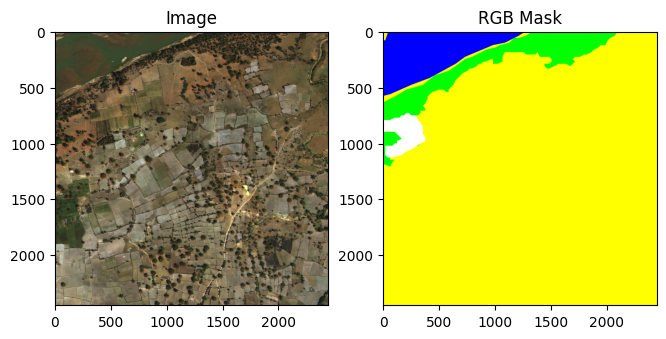

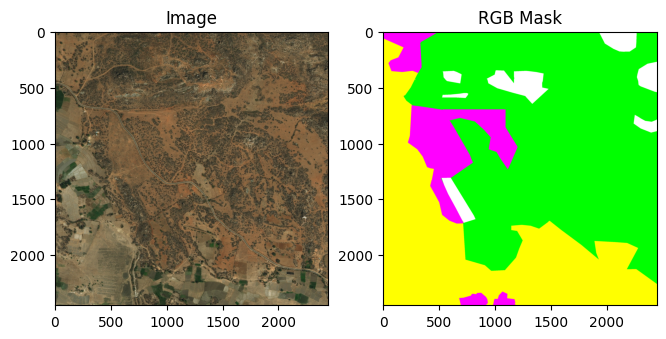

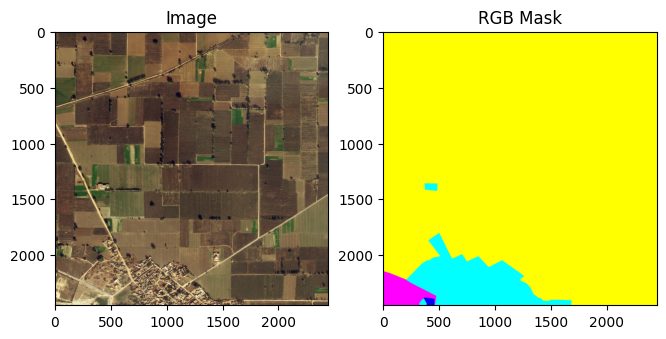

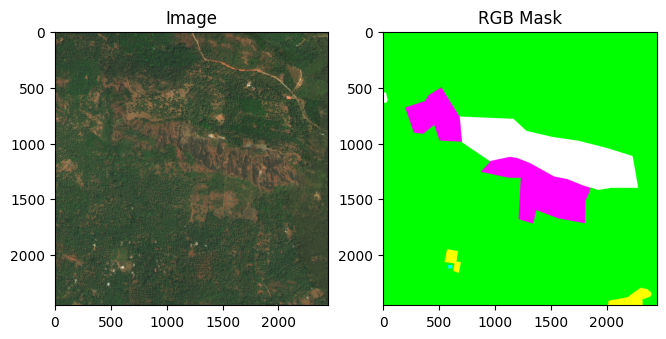

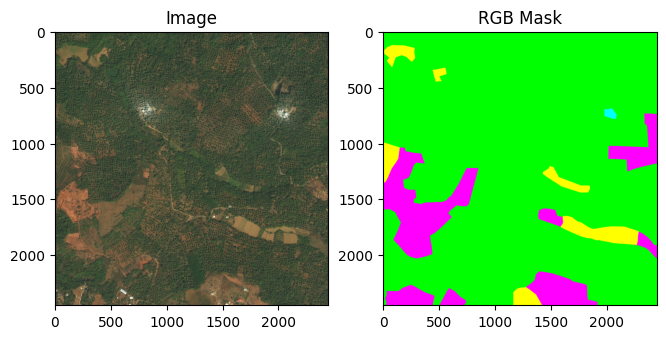

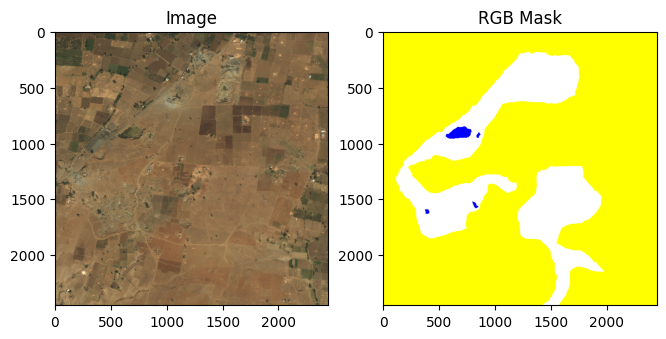

In [ ]:
# # Get the list of image and mask file names
image_files = [f for f in os.listdir(images_folder) if f.lower().endswith(('_sat.jpg'))]

n = 0

# Iterate through the files
for image_file in image_files:
    # Create the full paths
    image_path = os.path.join(images_folder, image_file)

    image_file = image_file[:-8] # obtain the image id of the file
    mask_path = os.path.join(masks_folder, image_file + '_mask.png')

    # Load the image and mask
    image = plt.imread(image_path).astype(np.float32) / 255.

    # Load the RGB mask
    rgb_mask = plt.imread(mask_path)

    # Example: Display the images
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('Image')

    plt.subplot(1, 3, 2)
    plt.imshow(rgb_mask)
    plt.title('RGB Mask')

    plt.show()

    n += 1
    if n > 5:
      break


Plot one satellite image

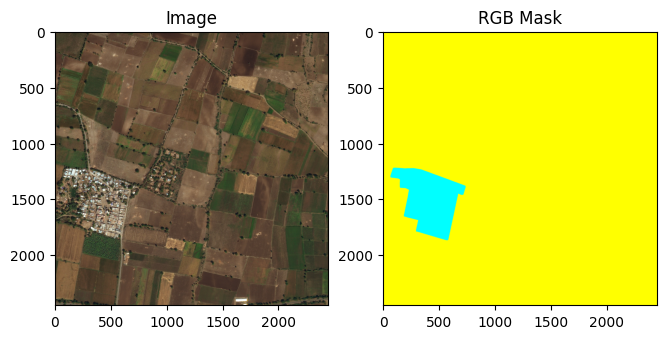

In [ ]:
image_file = '403978_sat.jpg'
# Create the full paths
image_path = os.path.join(images_folder, image_file)

image_file = image_file[:-8] # obtain the image id of the file
mask_path = os.path.join(masks_folder, image_file + '_mask.png')

# Load the image and mask
image = plt.imread(image_path).astype(np.float32) / 255.

# Load the RGB mask
rgb_mask = plt.imread(mask_path)

# Example: Display the images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Image')

plt.subplot(1, 3, 2)
plt.imshow(rgb_mask)
plt.title('RGB Mask')

plt.show()

## Image Resize

* Convert the satellite image and its RGB mask from 2448x2448 pixels to 256x256 pixels
* Visualize the resized RGB image (the satellite image and the RGB mask)

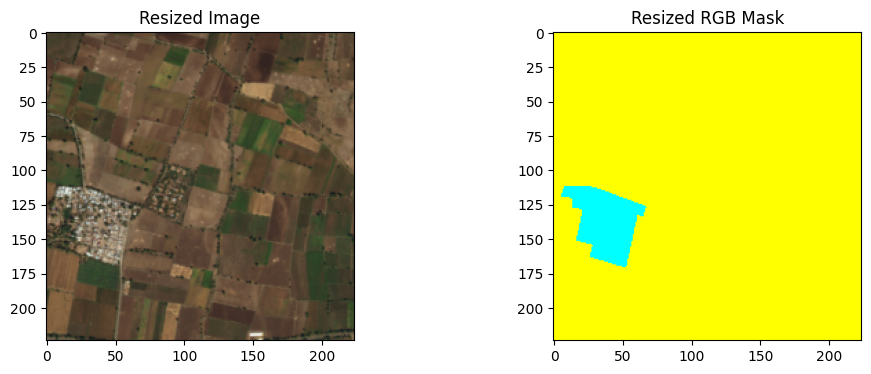

In [ ]:
# Convert the satellite image and segmentation mask to 256x256x3

import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize


# Assuming input masks are in PNG format and stored in masks_folder
masks_folder = '/content/mask/'
mask_files = [f for f in os.listdir(masks_folder) if f.lower().endswith(('_mask.png'))]

# Assuming input images are in images_folder
images_folder = '/content/train/'

# Example image file
image_file = '403978_sat.jpg'

# Load the image and mask
image_path = os.path.join(images_folder, image_file)
image = plt.imread(image_path).astype(np.float32) / 255.

image_file = image_file[:-8]  # obtain the image id of the file
mask_path = os.path.join(masks_folder, image_file + '_mask.png')
rgb_mask = plt.imread(mask_path)

# Resize the image to 256x256x3
mask_resized = resize(rgb_mask, (224, 224, 3), order=0, anti_aliasing=False, preserve_range=True)

# Resize the image to 256x256x3
image_resized = resize(image, (224, 224, 3), anti_aliasing=True)

# Display the images side by side
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_resized)
plt.title('Resized Image')

plt.subplot(1, 2, 2)
plt.imshow(mask_resized)
plt.title('Resized RGB Mask')

plt.show()


## Image Resizing

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize


# Assuming input images are 256x256 with 3 channels
input_shape = (224, 224, 3)

# Load your dataset and preprocess it
images_data = []
masks_data = []

# Adjust the path to your dataset folders
images_folder = '/content/train/'
masks_folder = '/content/mask/'

image_files = [f for f in os.listdir(images_folder) if f.lower().endswith(('_sat.jpg'))]

# RGB to Class Mapping
rgb_to_class = {
    (0, 1, 1): 0,  # urban_land
    (1, 1, 0): 1,  # agriculture_land
    (1, 0, 1): 2,  # rangeland
    (0, 1, 0): 3,  # forest_land
    (0, 0, 1): 4,  # water
    (1, 1, 1): 5,  # barren_land
    (0, 0, 0): 6  # unknown
}

# Create class array for RGB to class mapping
class_labels = np.array(list(rgb_to_class.values()))

for image_file in image_files:
    image_path = os.path.join(images_folder, image_file)
    image_id = image_file[:-8]  # obtain the image id
    mask_path = os.path.join(masks_folder, image_id + '_mask.png')

    # Load the image and mask
    image = plt.imread(image_path).astype(np.float32) / 255.
    rgb_mask = plt.imread(mask_path)

    # Resize the image to 224x224
    image_resized = resize(image, input_shape, anti_aliasing=True)

    # Resize the mask to 224x224
    mask_resized = resize(rgb_mask, input_shape, order=0, anti_aliasing=False, preserve_range=True)

    # Convert RGB mask to class labels
    mask_labels = np.zeros(mask_resized.shape[:2], dtype=int)
    for value, label in rgb_to_class.items():
        mask_labels[np.all(mask_resized == value, axis=-1)] = label

    images_data.append(image_resized)
    masks_data.append(mask_labels)


images_data = np.array(images_data)
masks_data = np.array(masks_data)

In [ ]:
print(input_shape[:2])

(224, 224)


Save the numpy arrays for next steps

In [ ]:
# Save to Google Drive
np.save("/content/drive/MyDrive/ad-hoc_data/archive/x_images.npy", images_data)
np.save("/content/drive/MyDrive/ad-hoc_data/archive/y_masks.npy", masks_data)
print(images_data.shape)
print(masks_data.shape)

del images_data, masks_data

(803, 224, 224, 3)
(803, 224, 224)
